In [1]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
mock=pd.read_csv(r"C:\Users\Ranajoy Bhattacharya\Downloads\BBI+DataScience_Dec2020\MockSurveyData.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
mock.head()


,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,Air_Terminal,Sea_Terminal,Land_Terminal,langint,1st_visit,length_stay,travel_type,f1_gender,f3_occupation,f4_industry,f5_designation,f5_designation.oth,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,shop_$anti,shop_$oth,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,01-Jan-15,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.15,Terminal 1,NaN,NaN,English,No,4 days,Non-Packaged,Male,"Businessman (small company, <50 people)",Marketing & Media,Director,,0.00,0.00,0.00,0.00,0.00,0.00,750.00,0.00,0.00,750.00,153.23,76.61,11.49,0.00,0.00,0.00,0.0,854.85,"1,096.19",Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.94,NaN,RFT,NaN,English,No,2 days,Packaged,Male,"Professiols (doctor, lawyer, lecturer, etc)",Electronics & Precision Engineering,Others (specify),Engineer,66.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.67,155.74,24.85,27.20,0.00,0.00,0.00,0.0,171.52,379.31,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.87,NaN,RFT,NaN,English,No,3 days,Non-Packaged,Female,Homemaker (Full time),NaN,NaN,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,148.15,139.77,27.95,0.00,0.00,0.00,0.0,104.85,420.73,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Others,368.29,NaN,RFT,NaN,English,No,1 day,Non-Packaged,Female,"Professiols (doctor, lawyer, lecturer, etc)",Transportation and Logistics,Others (specify),Accountant,25.00,0.00,0.00,0.00,0.00,91.00,0.00,0.00,0.00,116.00,0.00,143.76,14.38,0.00,0.00,0.00,0.0,220.85,378.99,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.25,NaN,RFT,NaN,English,No,1 day,Packaged,Male,Student,NaN,NaN,,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153.23,45.97,38.31,0.00,0.00,0.00,0.0,104.85,342.36,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [4]:
mock.shape

(8887, 48)

In [5]:
null_value=mock.isnull().sum()[mock.isnull().sum()*100//len(mock)>30]*100//len(mock)
null_value.sort_values(inplace=True)
null_value

f4_industry           32
f5_designation.oth    33
f5_designation        34
Air_Terminal          35
MainHotel             51
Sea_Terminal          68
travel_companion.2    81
travel_companion.3    94
Land_Terminal         96
travel_companion.4    98
travel_companion.5    99
dtype: int64

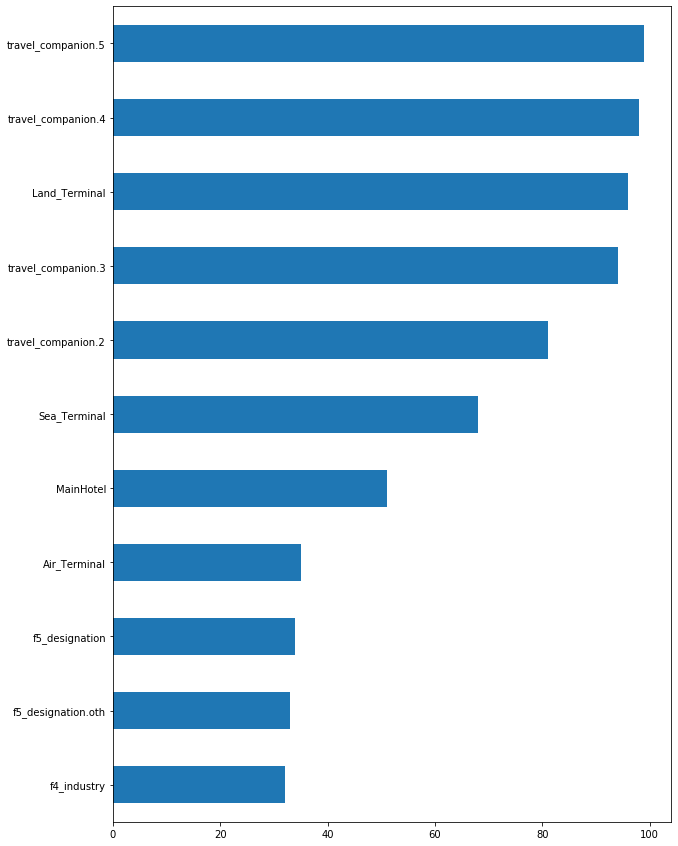

In [6]:
plt.figure(figsize=(10,15))
null_value.plot.barh()
plt.show()

In [7]:
mock.columns

Index(['case', 'Year', 'R.mth', 'date', 'intv_nam', 'Country_residence', 'City_residence', 'Purpose_grp', 'Purpose', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'langint', '1st_visit', 'length_stay', 'travel_type', 'f1_gender', 'f3_occupation', 'f4_industry', 'f5_designation', 'f5_designation.oth', 'shop_$fash', 'shop_$jew', 'shop_$wat', 'shop_$well', 'shop_$food', 'shop_$gift', 'shop_$ctec', 'shop_$anti', 'shop_$oth', 'shop_$any', 'totacc_$', 'totfnb_$', 'tottran_$', 'totbiz_$', 'totedu_$', 'totmedi_$', 'tototh_$', 'totshopping_$', 'totexp_$', 'MainAccomm', 'MainHotel', 'travel_companion.1', 'travel_companion.2', 'travel_companion.3', 'travel_companion.4', 'travel_companion.5'], dtype='object')

**There are 11 columns having null values greater than 30%, we cannot substitute these null values with any other value. We will drop these columns for better analysis. Here we are creating a new dataframe (mock_new) without these columns for further analysis.**

In [8]:
columns_to_use=mock.isnull().sum()[mock.isnull().sum()*100//len(mock)<30].index
mock_new=mock.loc[:,columns_to_use]
mock_new.head()

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,langint,1st_visit,length_stay,travel_type,f1_gender,f3_occupation,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,shop_$anti,shop_$oth,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$,MainAccomm,travel_companion.1
0,18,2015,January,01-Jan-15,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.15,English,No,4 days,Non-Packaged,Male,"Businessman (small company, <50 people)",0.00,0.00,0.00,0.00,0.00,0.00,750.00,0.00,0.00,750.00,153.23,76.61,11.49,0.00,0.00,0.00,0.0,854.85,"1,096.19",Hotel,Spouse
1,41,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.94,English,No,2 days,Packaged,Male,"Professiols (doctor, lawyer, lecturer, etc)",66.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.67,155.74,24.85,27.20,0.00,0.00,0.00,0.0,171.52,379.31,Hotel,Spouse
2,43,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.87,English,No,3 days,Non-Packaged,Female,Homemaker (Full time),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,148.15,139.77,27.95,0.00,0.00,0.00,0.0,104.85,420.73,Hotel,Spouse
3,44,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Others,368.29,English,No,1 day,Non-Packaged,Female,"Professiols (doctor, lawyer, lecturer, etc)",25.00,0.00,0.00,0.00,0.00,91.00,0.00,0.00,0.00,116.00,0.00,143.76,14.38,0.00,0.00,0.00,0.0,220.85,378.99,Accommodation not required - Others,Partner/ Boyfriend/ Girlfriend
4,45,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.25,English,No,1 day,Packaged,Male,Student,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153.23,45.97,38.31,0.00,0.00,0.00,0.0,104.85,342.36,Hotel,Parents/ Parents-in-law


In [9]:
mock_new.shape

(8887, 37)

In [10]:
mock_new.isnull().sum()[mock_new.isnull().sum()!=0]

shop_$fash    80
shop_$jew     80
shop_$wat     80
shop_$well    80
shop_$food    80
shop_$gift    80
shop_$ctec    80
shop_$anti    80
shop_$oth     80
shop_$any     80
MainAccomm    33
dtype: int64

**NOW WE WILL BE TREATING MISSING VALUES OF EACH OF THE COLUMNS**
 1. For MainAccom we are replacing all blanks by using 'Unspecified'<br>
2.For the columns,
shop_$fash, shop_$jew , shop_$wat, shop_$well , shop_$food  , shop_$gift, shop_$ctec, shop_$anti, shop_$ot, shop_$any     
we observe that all these 10 columns have 80 null rows and it is null for all these columns , as it is negligible as compared to the total number of rows we select to delete all of them


In [11]:
mock_new.MainAccomm.fillna('UNSPECIFIED',inplace=True)

In [12]:
mock_new=mock_new[~mock_new['shop_$fash'].isnull()]

**For the columns,
shop_$fash, shop_$jew , shop_$wat, shop_$well , shop_$food  , shop_$gift, shop_$ctec, shop_$anti, shop_$ot, shop_$any     
we observe that all these 10 columns have 80 null rows and it is null for all these columns , as it is negligible as compared to the total number of rows we select to delete all of them**

In [13]:
mock_new.isnull().sum()[mock_new.isnull().sum()!=0]

Series([], dtype: int64)

Now we do not have any more null values, all missing values are treated properly.

In [14]:
mock_new.head()

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,langint,1st_visit,length_stay,travel_type,f1_gender,f3_occupation,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,shop_$anti,shop_$oth,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$,MainAccomm,travel_companion.1
0,18,2015,January,01-Jan-15,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.15,English,No,4 days,Non-Packaged,Male,"Businessman (small company, <50 people)",0.00,0.00,0.00,0.00,0.00,0.00,750.00,0.00,0.00,750.00,153.23,76.61,11.49,0.00,0.00,0.00,0.0,854.85,"1,096.19",Hotel,Spouse
1,41,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.94,English,No,2 days,Packaged,Male,"Professiols (doctor, lawyer, lecturer, etc)",66.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.67,155.74,24.85,27.20,0.00,0.00,0.00,0.0,171.52,379.31,Hotel,Spouse
2,43,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.87,English,No,3 days,Non-Packaged,Female,Homemaker (Full time),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,148.15,139.77,27.95,0.00,0.00,0.00,0.0,104.85,420.73,Hotel,Spouse
3,44,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Leisure,Others,368.29,English,No,1 day,Non-Packaged,Female,"Professiols (doctor, lawyer, lecturer, etc)",25.00,0.00,0.00,0.00,0.00,91.00,0.00,0.00,0.00,116.00,0.00,143.76,14.38,0.00,0.00,0.00,0.0,220.85,378.99,Accommodation not required - Others,Partner/ Boyfriend/ Girlfriend
4,45,2015,January,01-Jan-15,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.25,English,No,1 day,Packaged,Male,Student,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153.23,45.97,38.31,0.00,0.00,0.00,0.0,104.85,342.36,Hotel,Parents/ Parents-in-law


In [15]:
mock_new.Weights_QTR.describe()

count       8807
unique       191
top       317.74
freq         160
Name: Weights_QTR, dtype: object

**CONVERTING OBJECT TYPE DATA TYPE INTO FLOAT TYPE FOR FURTHER ANALYSIS**

In [16]:
mock_new.Weights_QTR=mock_new.Weights_QTR.str.replace(",", "")

In [17]:
mock_new.Weights_QTR.value_counts()

317.74     160
308.77     154
310.76     135
451.40     133
400.19     125
331.46     121
376.95     120
402.83     118
389.54     117
508.09     117
378.07     116
439.20     114
445.65     112
433.78     112
500.79     107
484.03     105
539.09     104
521.41     102
561.94     100
419.09     100
623.09      98
564.70      98
472.13      97
571.30      96
541.88      94
351.88      93
622.15      93
337.10      93
625.51      92
458.73      91
371.24      91
335.67      87
550.73      83
564.43      82
589.61      82
444.54      80
483.10      78
474.82      77
354.77      77
559.28      75
682.40      73
652.33      71
666.42      71
728.75      71
383.74      69
615.77      69
643.96      67
386.03      67
824.68      66
783.98      65
341.94      64
673.11      64
581.67      64
439.02      63
632.15      62
432.87      60
773.48      60
534.88      60
442.86      58
460.22      58
643.26      57
805.26      54
499.83      53
659.36      53
445.92      52
821.27      52
473.09    

In [18]:
mock_new.Weights_QTR=mock_new.Weights_QTR.astype(float)

In [19]:
mock_new.Weights_QTR.describe()

count    8807.000000
mean      597.579260
std       349.477178
min       262.480000
25%       419.090000
50%       539.090000
75%       672.110000
max      8958.000000
Name: Weights_QTR, dtype: float64

**CONVERTING OBJECT TYPE DATA TYPES INTO FLOAT TYPE FOR FURTHER ANALYSIS**

In [20]:
mock_new['totshopping_$'].value_counts()

89.81     333
92.43     312
93.32     296
93.89     290
88.03     269
         ... 
138.86      1
128.81      1
128.84      1
103.23      1
121.16      1
Name: totshopping_$, Length: 1608, dtype: int64

In [21]:
mock_new['totshopping_$']=mock_new['totshopping_$'].str.replace(",", "")

In [22]:
mock_new['totshopping_$']=mock_new['totshopping_$'].astype(float)

In [23]:
mock_new['totshopping_$'].value_counts()

89.81      333
92.43      312
93.32      296
93.89      290
88.03      269
          ... 
231.39       1
333.32       1
258.43       1
1081.32      1
312.00       1
Name: totshopping_$, Length: 1608, dtype: int64

**CONVERTING OBJECT TYPE DATA TYPES INTO FLOAT TYPE FOR FURTHER ANALYSIS**

In [24]:
mock_new['totexp_$']=mock_new['totexp_$'].str.replace(",", "")

In [25]:
mock_new['totexp_$']=mock_new['totexp_$'].astype(float)

In [26]:
mock_new['totexp_$'].value_counts()

89.81      29
93.32      22
93.89      20
80.86      19
92.43      18
           ..
1006.59     1
105.04      1
400.53      1
233.15      1
400.00      1
Name: totexp_$, Length: 7748, dtype: int64

**TREATMENT OF OUTLIERS**

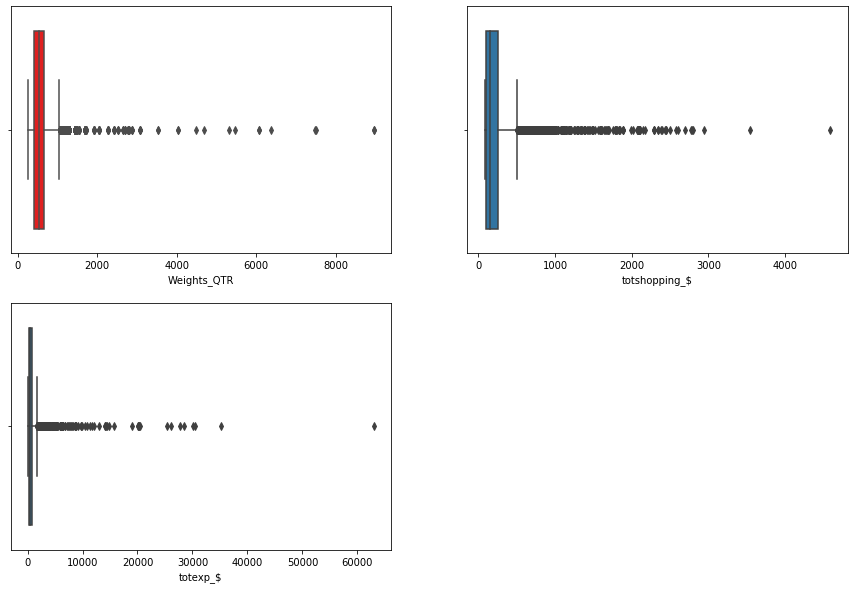

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(mock_new.Weights_QTR,color='red')
plt.xticks(fontsize=10)

plt.subplot(2,2,2)
sns.boxplot(mock_new['totshopping_$'])
plt.xticks(fontsize=10)

plt.subplot(2,2,3)
sns.boxplot(mock_new['totexp_$'])
plt.xticks(fontsize=10)

plt.show()

**To remove the above outliers we will take the values till 0.98 quantile for further analysis**

In [28]:
mock_new=mock_new[mock_new.Weights_QTR<mock_new.Weights_QTR.quantile(0.98)]
mock_new=mock_new[mock_new['totshopping_$']<mock_new['totshopping_$'].quantile(0.98)]
mock_new=mock_new[mock_new['totexp_$']<mock_new['totexp_$'].quantile(0.98)]



**REMOVING OUTLIERS AND PLOTTING AGAIN**

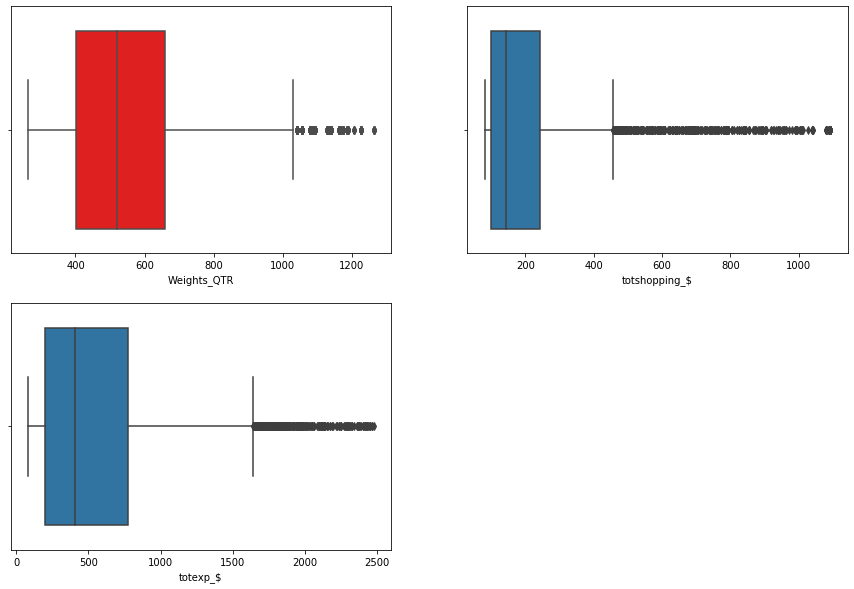

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(mock_new.Weights_QTR,color='red')
plt.xticks(fontsize=10)

plt.subplot(2,2,2)
sns.boxplot(mock_new['totshopping_$'])
plt.xticks(fontsize=10)

plt.subplot(2,2,3)
sns.boxplot(mock_new['totexp_$'])
plt.xticks(fontsize=10)

plt.show()

In [30]:
mock_new.shape


(8271, 37)

**After taking the 0.98 quantile of data, we again plotted the boxplot for the same attributes and can observe that a smaller number of outliers are left.**

**ANALYSIS FOR Key insights:**

**UNIVARIATE ANALYSIS:**

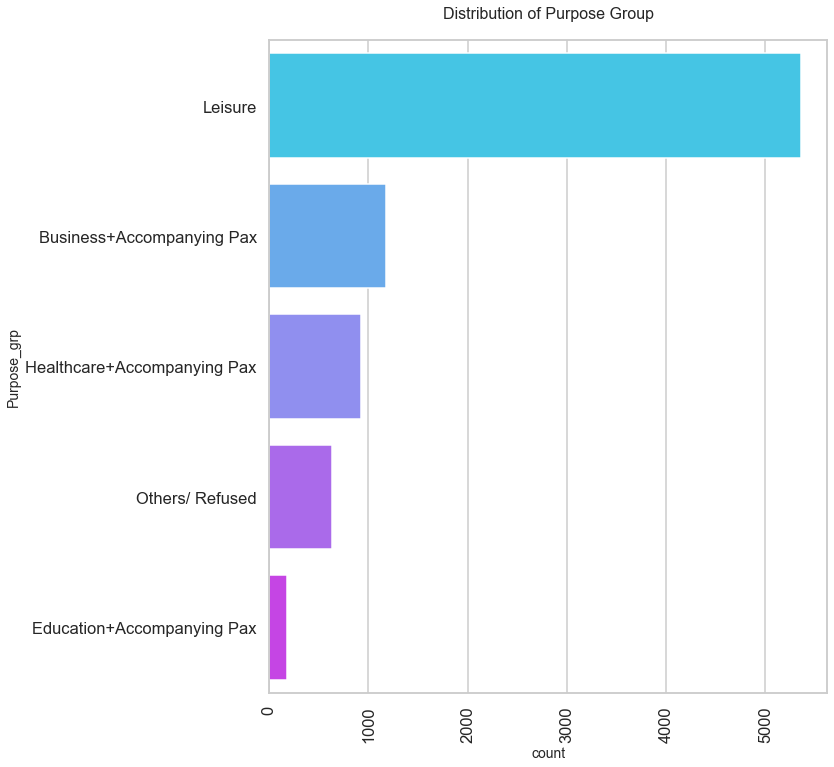

In [31]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10,12))
plt.rcParams["axes.labelsize"] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titlepad'] = 22

plt.title("Distribution of Purpose Group")

plt.xticks(rotation=90)


sns.countplot(data=mock_new,y='Purpose_grp',order=mock_new['Purpose_grp'].value_counts().index,palette='cool')

plt.show()


Conclusion:The leisure purpose group seems to have a much larger count than any categories.

Text(0.5, 0, 'month')

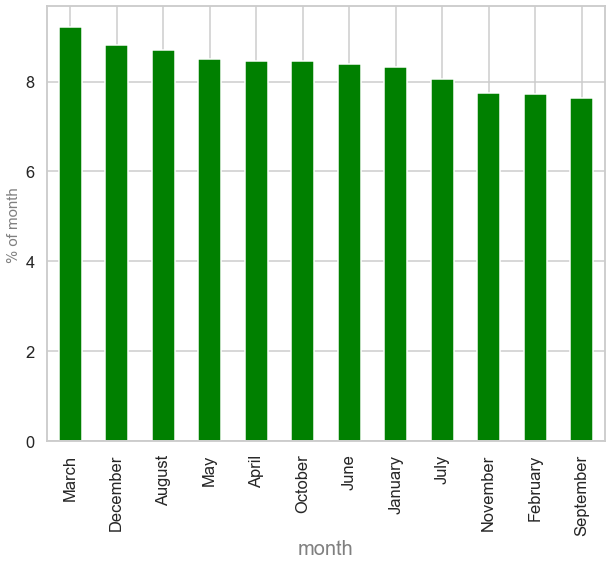

In [32]:
plt.figure(figsize=(10,8))

(mock_new['R.mth'].value_counts(normalize=True)*100).plot.bar(color='green')
plt.ylabel('% of month',fontsize=15,color='grey')
plt.xlabel('month',fontsize=20,color='grey')

**Conclusion: The month of March has the largest count of bookings while September seems to experience the lowest count.**

Text(0.5, 0, 'Number of days')

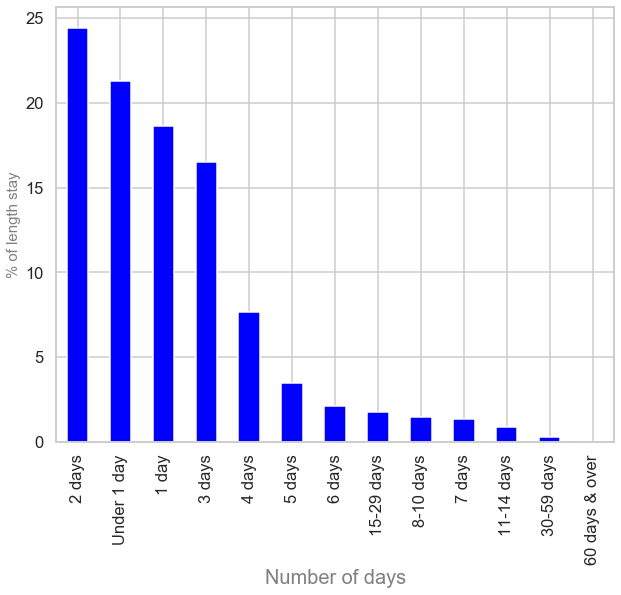

In [33]:
plt.figure(figsize=(10,8))
(mock_new['length_stay'].value_counts(normalize=True)*100).plot.bar(color='blue')
plt.ylabel('% of length stay',fontsize=15,color='grey')
plt.xlabel('Number of days',fontsize=20,color='grey')

Conclusion: Most people seem to have bookings for a period of 2 days and accounts for almost 25%.

Text(0.5, 0, 'occupation')

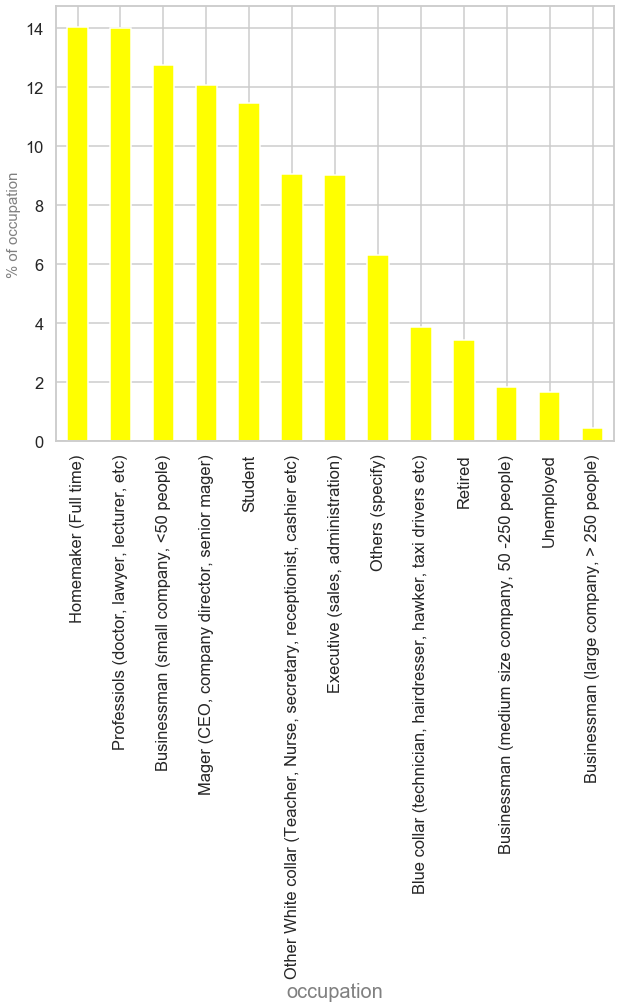

In [34]:
plt.figure(figsize=(10,8))
(mock_new['f3_occupation'].value_counts(normalize=True)*100).plot.bar(color='yellow')
plt.ylabel('% of occupation',fontsize=15,color='grey')
plt.xlabel('occupation',fontsize=20,color='grey')

Conclusion: Occupation of people visiting is maximum for homemakers and professionals, both are almost similar percentage. Businessman of large companies has the lowest percentage.

**BIVARIATE ANALYSIS:


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

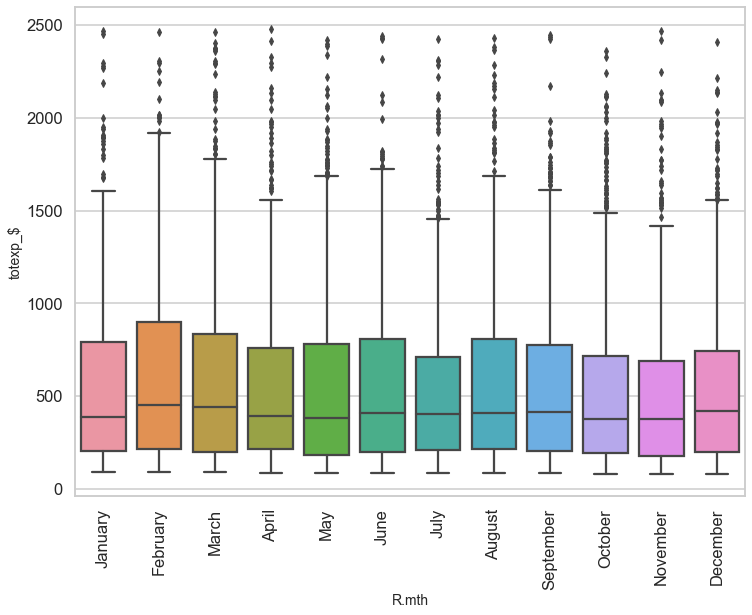

In [35]:
plt.figure(figsize=(12,9))


sns.boxplot(data=mock_new,x='R.mth',y='totexp_$')
plt.xticks(rotation=90)



**Conclusion: The total expenditure of people visiting comes out to be maximum in the month of February.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

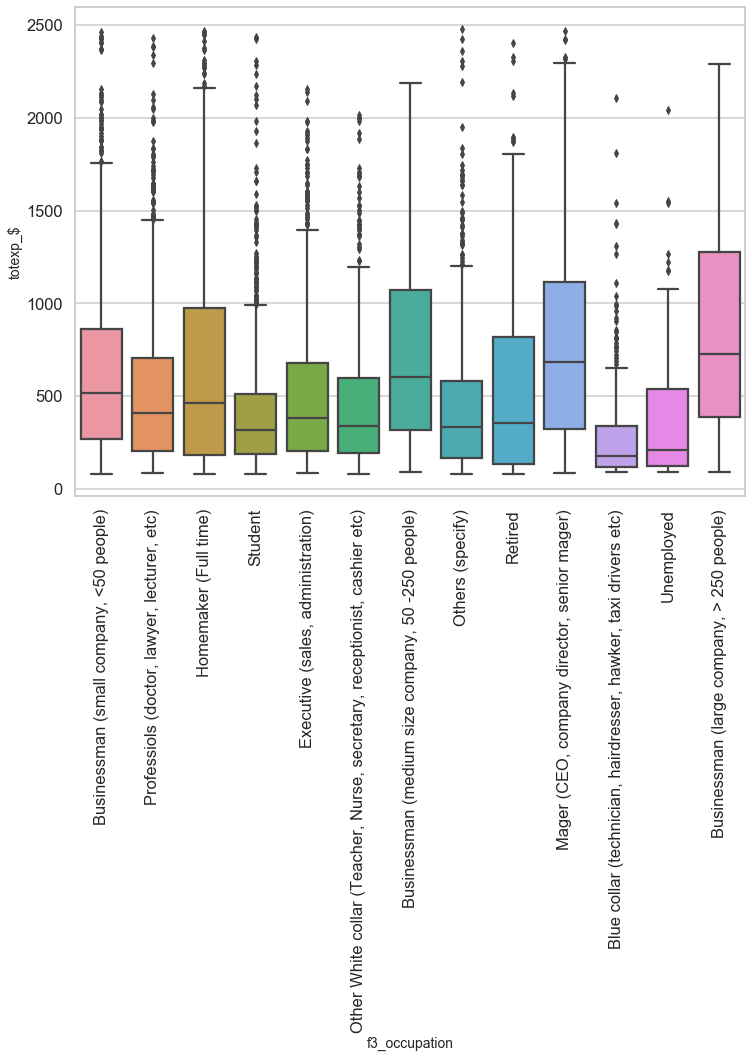

In [36]:
plt.figure(figsize=(12,9))


sns.boxplot(data=mock_new,x='f3_occupation',y='totexp_$')
plt.xticks(rotation=90)



In [37]:
mock_new.groupby('f3_occupation').median()['totexp_$']

f3_occupation
Blue collar (technician, hairdresser, hawker, taxi drivers etc)              176.140
Businessman (large company, > 250 people)                                    728.490
Businessman (medium size company, 50 -250 people)                            601.180
Businessman (small company, <50 people)                                      516.870
Executive (sales, administration)                                            383.125
Homemaker (Full time)                                                        464.425
Mager (CEO, company director, senior mager)                                  684.975
Other White collar (Teacher, Nurse, secretary, receptionist, cashier etc)    341.295
Others (specify)                                                             332.430
Professiols (doctor, lawyer, lecturer, etc)                                  406.850
Retired                                                                      356.990
Student                                            

Conclusion: Businessman (large company, > 250 people) accounts for the maximum count of total expenditure median wise, followed by Mager (CEO, company director, senior mager).

(array([0, 1]), <a list of 2 Text xticklabel objects>)

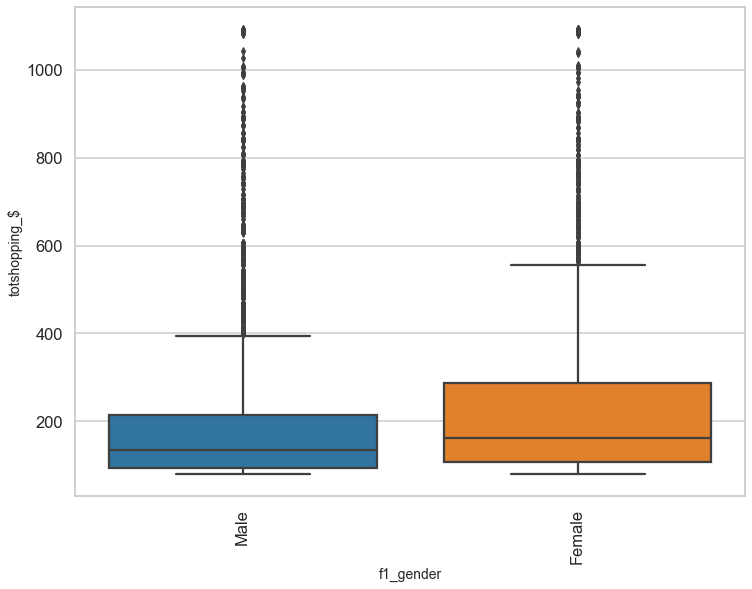

In [38]:
plt.figure(figsize=(12,9))


sns.boxplot(data=mock_new,x='f1_gender',y='totshopping_$')
plt.xticks(rotation=90)



Conclusion:Females has a more expenditure on shopping than men.
